<a href="https://colab.research.google.com/github/SUSREE64/ColabNotebooks/blob/main/NLP_Learning_with_NLTK_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NLP Tutorial with NLTK

In [2]:
# Here we are importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
import nltk
import string
import re
import seaborn as sns

### Tokenize

In [14]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
input_txt = "Hello this is plain text & it has words and numbers 1234"
wordTokens = word_tokenize(input_txt)
print(input_txt)
print(wordTokens)

Hello this is plain text & it has words and numbers 1234
['Hello', 'this', 'is', 'plain', 'text', '&', 'it', 'has', 'words', 'and', 'numbers', '1234']


In [5]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
file_path ="/content/gdrive/My Drive/Colab Notebooks/TwitterData/"
file_name = "train.csv"
file = file_path+file_name
train_df = pd.read_csv(file)
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Exploratory analysis on the data file

In [11]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [29]:
train_df.fillna({'keyword': 'None', 'location': 'None'}, inplace=True)

### Text Clean up and pre processing for NLP

In [15]:
def preprocess_text(text):
  text_lwr = text.lower()
  #remove https ---
  remove_url = re.compile(r'https?://\S+|www\.\S+')
  remove_url = remove_url.sub(r'',text_lwr)
  #remove some special characters
  remove_html=re.compile(r'<.*?>')
  remove_html = remove_html.sub(r'',remove_url)
  remove_emoji = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  remove_emoji = remove_emoji.sub(r'', remove_html)
  remove_punct=str.maketrans('','',string.punctuation)
  remove_punct = remove_emoji.translate(remove_punct)
    
  return remove_punct


In [13]:
text = train_df['text'][2567]
text

'Me and all my friends could destroy this in 2hours lmao  https://t.co/waCtT18gdA'

In [16]:
clean_text = preprocess_text(text)
clean_text

'me and all my friends could destroy this in 2hours lmao  '

In [18]:
train_df['clean_text'] = train_df['text'].astype('str').apply(preprocess_text)

In [19]:
train_df['clean_text'][0:10]

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    13000 people receive wildfires evacuation orde...
4    just got sent this photo from ruby alaska as s...
5    rockyfire update  california hwy 20 closed in ...
6    flood disaster heavy rain causes flash floodin...
7    im on top of the hill and i can see a fire in ...
8    theres an emergency evacuation happening now i...
9     im afraid that the tornado is coming to our area
Name: clean_text, dtype: object

### Model building

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.feature_extraction.text import CountVectorizer

#### ['location', 'keyword' , 'text'] are the features. target is the hand classified label column. A modle needs to be built on features. Categorical columns are OneHotEncoded to numeric form before applying a model.

In [21]:
categorical_features = ['keyword', 'location']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

text_to_vector_transformer = CountVectorizer()

preprocessor = ColumnTransformer(
    transformers = [ ('cat', categorical_transformer, categorical_features), ('text', text_to_vector_transformer, 'clean_text')])

### Building a classifier (first hot encoding ("preprocessor") and Logistic regression as a classifier

```
# This is formatted as code
```



In [23]:
clsfier = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])

In [24]:
### Separate features and label fromt the data set

In [31]:
X = train_df[['keyword','location','clean_text']]
y = train_df['target']

In [32]:
X.head(3)

,keyword,location,clean_text
0,None,None,our deeds are the reason of this earthquake ma...
1,None,None,forest fire near la ronge sask canada
2,None,None,all residents asked to shelter in place are be...


In [33]:
y.head(3)

0    1
1    1
2    1
Name: target, dtype: int64

#### Directly going for predicting 

In [41]:
y_pred = cross_val_predict(clsfier, X, y, cv=3)

In [42]:
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [43]:
## from sklearn import metrics for getting accuracy and other metrics for the model
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix, roc_curve

In [46]:
print( "accuracy", accuracy_score(y, y_pred))

accuracy 0.7041902009720216


In [47]:
print( "f1_score", f1_score(y, y_pred))

f1_score 0.6180461329715061


In [49]:
print("precision Score", precision_score(y, y_pred))

precision Score 0.6940952380952381


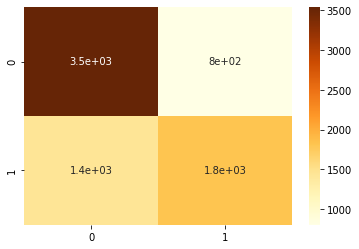

In [52]:
conf_matrix = confusion_matrix(y, y_pred)
p= sns.heatmap(annot=True, cmap='YlOrBr', data=conf_matrix)